<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/Training_small_Cifar10_dataset_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import zipfile
import keras
import os,shutil
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Activation
from keras import optimizers
from keras.utils import np_utils
import numpy as np

In [0]:
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with zipfile.ZipFile('/content/drive/My Drive/cifar10/cifar10.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cifar10')

In [0]:
original_data_dir = '/content/cifar10/train'
base_dir = '/content/cifar'

if os.path.isdir(base_dir):
  shutil.rmtree(base_dir)
if os.path.isdir(base_dir):
  os.rmdir(base_dir) 
  
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_cat_dir = os.path.join(train_dir,'cat')
train_dog_dir = os.path.join(train_dir,'dog')
train_airplane_dir = os.path.join(train_dir,'airplane')
train_automobile_dir = os.path.join(train_dir,'automobile')
train_bird_dir = os.path.join(train_dir,'bird')
train_deer_dir = os.path.join(train_dir,'deer')
train_frog_dir = os.path.join(train_dir,'frog')
train_horse_dir = os.path.join(train_dir,'horse')
train_ship_dir = os.path.join(train_dir,'ship')
train_truck_dir = os.path.join(train_dir,'truck')

validation_cat_dir = os.path.join(validation_dir,'cat')
validation_dog_dir = os.path.join(validation_dir,'dog')
validation_airplane_dir = os.path.join(validation_dir,'airplane')
validation_automobile_dir = os.path.join(validation_dir,'automobile')
validation_bird_dir = os.path.join(validation_dir,'bird')
validation_deer_dir = os.path.join(validation_dir,'deer')
validation_frog_dir = os.path.join(validation_dir,'frog')
validation_horse_dir = os.path.join(validation_dir,'horse')
validation_ship_dir = os.path.join(validation_dir,'ship')
validation_truck_dir = os.path.join(validation_dir,'truck')

test_cat_dir = os.path.join(test_dir,'cat')
test_dog_dir = os.path.join(test_dir,'dog')
test_airplane_dir = os.path.join(test_dir,'airplane')
test_automobile_dir = os.path.join(test_dir,'automobile')
test_bird_dir = os.path.join(test_dir,'bird')
test_deer_dir = os.path.join(test_dir,'deer')
test_frog_dir = os.path.join(test_dir,'frog')
test_horse_dir = os.path.join(test_dir,'horse')
test_ship_dir = os.path.join(test_dir,'ship')
test_truck_dir = os.path.join(test_dir,'truck')

if os.path.isdir(base_dir) == False:
  os.mkdir(base_dir)
  os.mkdir(train_dir)
  os.mkdir(test_dir)
  os.mkdir(validation_dir)
  
  os.mkdir(train_cat_dir)
  os.mkdir(train_dog_dir)
  os.mkdir(train_airplane_dir)
  os.mkdir(train_automobile_dir)
  os.mkdir(train_bird_dir)
  os.mkdir(train_deer_dir)
  os.mkdir(train_frog_dir)
  os.mkdir(train_horse_dir)
  os.mkdir(train_ship_dir)
  os.mkdir(train_truck_dir)

  os.mkdir(validation_cat_dir)
  os.mkdir(validation_dog_dir)
  os.mkdir(validation_airplane_dir)
  os.mkdir(validation_automobile_dir)
  os.mkdir(validation_bird_dir)
  os.mkdir(validation_deer_dir)
  os.mkdir(validation_frog_dir)
  os.mkdir(validation_horse_dir)
  os.mkdir(validation_ship_dir)
  os.mkdir(validation_truck_dir)

  os.mkdir(test_cat_dir)
  os.mkdir(test_dog_dir)
  os.mkdir(test_airplane_dir)
  os.mkdir(test_automobile_dir)
  os.mkdir(test_bird_dir)
  os.mkdir(test_deer_dir)
  os.mkdir(test_frog_dir)
  os.mkdir(test_horse_dir)
  os.mkdir(test_ship_dir)
  os.mkdir(test_truck_dir)


In [0]:
def list_files(directory, ending):
  return (f for f in os.listdir(directory) if f.endswith(ending))
def list_from_org(ending):
  return list_files(original_data_dir,ending)

cats = list(list_from_org('_cat.png'))
dogs = list(list_from_org('_dog.png'))
airplanes = list(list_from_org('_airplane.png'))
automobiles = list(list_from_org('_automobile.png'))
birds = list(list_from_org('_bird.png'))
deers = list(list_from_org('_deer.png'))
frogs = list(list_from_org('_frog.png'))
horses = list(list_from_org('_horse.png'))
ships = list(list_from_org('_ship.png'))
trucks = list(list_from_org('_truck.png'))

In [0]:

def copy_classes(class_objs, dest_dir ) :
  for obj in class_objs:
    src = os.path.join(original_data_dir, obj)
    dst = os.path.join(dest_dir, obj)
    shutil.copyfile(src, dst)

copy_classes(cats[:1000],train_cat_dir)
copy_classes(dogs[:1000],train_dog_dir)
copy_classes(airplanes[:1000],train_airplane_dir)
copy_classes(automobiles[:1000],train_automobile_dir)
copy_classes(birds[:1000],train_bird_dir)
copy_classes(deers[:1000],train_deer_dir)
copy_classes(frogs[:1000],train_frog_dir)
copy_classes(horses[:1000],train_horse_dir)
copy_classes(ships[:1000],train_ship_dir)
copy_classes(trucks[:1000],train_truck_dir)

copy_classes(cats[1000:1500],validation_cat_dir)
copy_classes(dogs[1000:1500],validation_dog_dir)
copy_classes(airplanes[1000:1500],validation_airplane_dir)
copy_classes(automobiles[1000:1500],validation_automobile_dir)
copy_classes(birds[1000:1500],validation_bird_dir)
copy_classes(deers[1000:1500],validation_deer_dir)
copy_classes(frogs[1000:1500],validation_frog_dir)
copy_classes(horses[1000:1500],validation_horse_dir)
copy_classes(ships[1000:1500],validation_ship_dir)
copy_classes(trucks[1000:1500],validation_truck_dir)

copy_classes(cats[1500:2000],test_cat_dir)
copy_classes(dogs[1500:2000],test_dog_dir)
copy_classes(airplanes[1500:2000],test_airplane_dir)
copy_classes(automobiles[1500:2000],test_automobile_dir)
copy_classes(birds[1500:2000],test_bird_dir)
copy_classes(deers[1500:2000],test_deer_dir)
copy_classes(frogs[1500:2000],test_frog_dir)
copy_classes(horses[1500:2000],test_horse_dir)
copy_classes(ships[1500:2000],test_ship_dir)
copy_classes(trucks[1500:2000],test_truck_dir)


In [0]:

def create_model(shape = 32, samePadding = False):
  _padding = 'same' if samePadding else 'valid'
  _model = models.Sequential()
  _model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (shape, shape, 3), padding= _padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Conv2D(64, (3, 3), activation='relu', padding=_padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Conv2D(64, (3, 3), activation='relu', padding=_padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Conv2D(128, (3, 3), activation='relu', padding=_padding))
  _model.add(layers.MaxPooling2D(2, 2))
  _model.add(layers.Flatten())
  _model.add(layers.Dense(512, activation='relu'))
  _model.add(layers.Dense(10, activation='softmax'))

  opt = keras.optimizers.rmsprop(lr=1e-4)
  _model.compile(loss='categorical_crossentropy',
               optimizer= opt,
               metrics = ['accuracy'])
  return _model

##############################################
#create_dirs()
##############################################
def fit_model_gen(_model,
                  _train_datagen = ImageDataGenerator(rescale=1./255),
                  _train_batch_size=20,
                  _epochs = 30,
                  _shuffle = False,
                  _modelName = 'cifar10_small.h5',
                  _shape=32):
                 
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = _train_datagen.flow_from_directory(
      train_dir,
      target_size=(_shape,_shape),
      batch_size=20,
      class_mode = 'categorical')


  validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size=(_shape,_shape),
      batch_size=_train_batch_size,
      class_mode = 'categorical')

  _history = _model.fit_generator(
      train_generator,
      steps_per_epoch = 100,
      epochs = _epochs,
      validation_data=validation_generator,
      validation_steps=50,
      shuffle=_shuffle,
      workers=4)
  
  model.save(_modelName)
  model.save('/content/drive/My Drive/cifar10/' + _modelName)
  return _history

##############################################
def fit_model(_model,x_train, y_train,x_test, y_test,_modelName = 'cifar10_small.h5'):  
  y_train = np_utils.to_categorical(y_train, 10)
  y_test = np_utils.to_categorical(y_test, 10)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  _history = _model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=100,
                        validation_data=(x_test, y_test))
  
  model.save(_modelName)
  model.save('/content/drive/My Drive/cifar10/' + _modelName)
  return _history

#################################################
def train_val_by_metric(history,metric):
  history_dict = history.history
  #history_dict.keys()
  values = history_dict[metric]
  val_values = history_dict['val_'+metric]

  epochs = range(1, len(values) + 1)
  
  plt.plot(epochs, values, 'bo', label= 'Training '+metric)
  plt.plot(epochs, val_values, 'b', label= 'Validation '+metric)
  metricTitle = 'Loss' if metric == 'loss' else 'Accuracy'
  plt.title('Training and validation '+metricTitle)
  plt.xlabel('Epochs')
  plt.ylabel(metricTitle)
  plt.legend()

  plt.show()
###################################################
def train_val_res(history):
  train_val_by_metric(history,'loss')
  train_val_by_metric(history,'acc')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 128)         73856     
__________

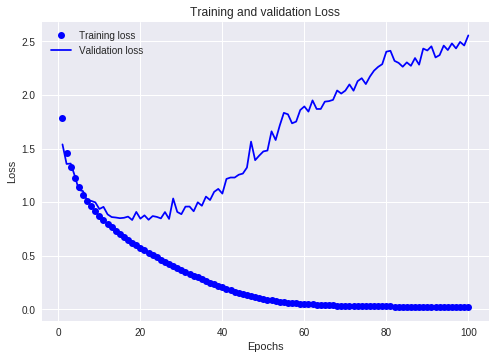

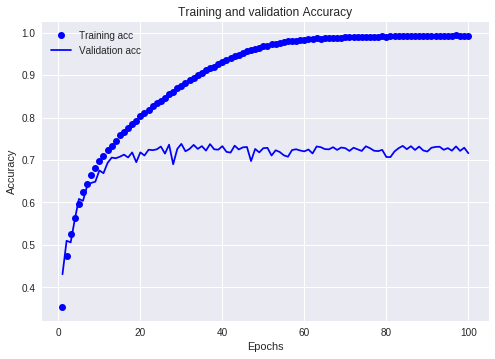

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
model = create_model(32, samePadding = True)
model.summary()
history = fit_model(model,x_train, y_train,x_test, y_test,_modelName = 'cifar10_Full.h5')
train_val_res(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 128)         73856     
__________

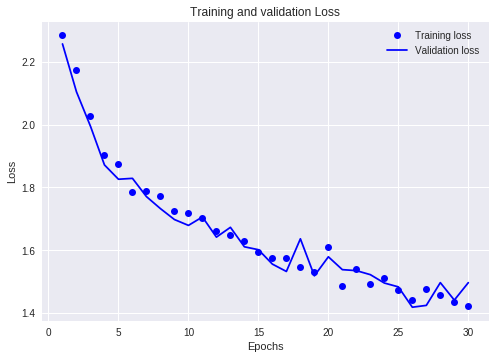

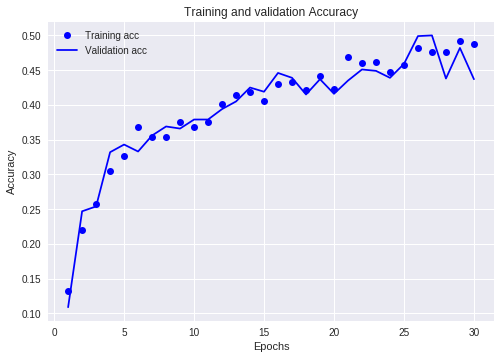

In [0]:
model = create_model(32, samePadding = True)
model.summary()
history = fit_model_gen(model,_modelName = 'cifar10_small_1.h5')
train_val_res(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
__________

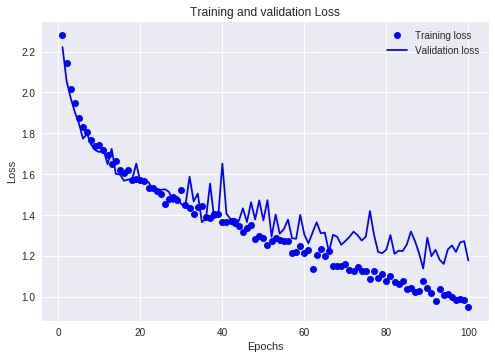

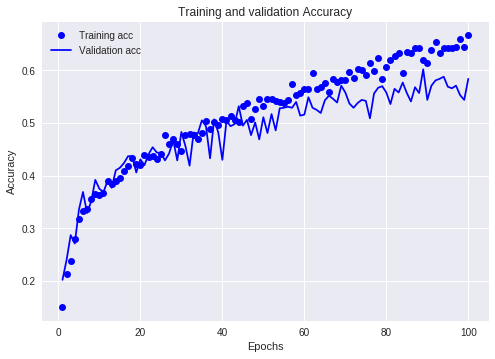

In [0]:
model = create_model(samePadding = True)
model.summary()
history = fit_model_gen(model,_epochs = 100, _modelName = 'cifar10_small_2_100epc.h5')
train_val_res(history)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/100
100/100 [==============================] - 4s 42ms/step - loss: 2.2912 - acc: 0.1370 - val_loss: 2.2574 - val_acc: 0.1831
Epoch 2/100
100/100 [==============================] - 4s 40ms/step - loss: 2.1883 - acc: 0.1910 - val_loss: 2.0929 - val_acc: 0.2512
Epoch 3/100
100/100 [==============================] - 4s 40ms/step - loss: 2.0998 - acc: 0.2160 - val_loss: 2.0391 - val_acc: 0.2531
Epoch 4/100
100/100 [==============================] - 4s 39ms/step - loss: 2.0383 - acc: 0.2345 - val_loss: 1.9972 - val_acc: 0.2602
Epoch 5/100
100/100 [==============================] - 4s 39ms/step - loss: 2.0041 - acc: 0.2630 - val_loss: 1.9336 - val_acc: 0.3025
Epoch 6/100
100/100 [==============================] - 4s 39ms/step - loss: 1.9622 - acc: 0.2775 - val_loss: 1.9728 - val_acc: 0.2894
Epoch 7/100
100/100 [==============================] - 4s 39ms/step - loss: 1.9564 - acc: 0.2985 - val_loss: 

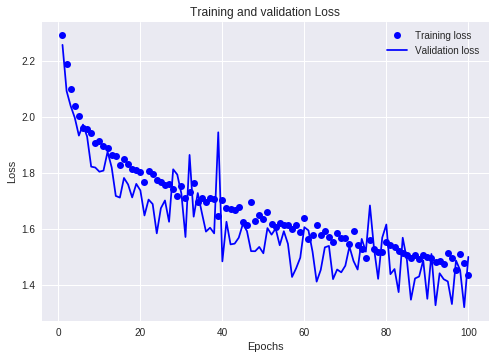

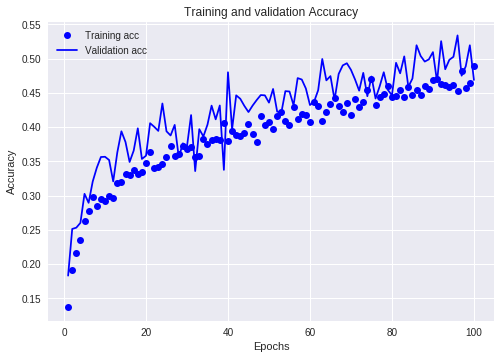

In [0]:
model = create_model(samePadding = True)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
history = fit_model_gen(model,train_datagen,32,100)
train_val_res(history)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/100
100/100 [==============================] - 14s 145ms/step - loss: 2.1749 - acc: 0.1820 - val_loss: 2.0269 - val_acc: 0.2594
Epoch 2/100
100/100 [==============================] - 12s 124ms/step - loss: 2.0092 - acc: 0.2660 - val_loss: 1.8809 - val_acc: 0.3644
Epoch 3/100
100/100 [==============================] - 12s 124ms/step - loss: 1.9653 - acc: 0.2775 - val_loss: 1.8222 - val_acc: 0.3556
Epoch 4/100
100/100 [==============================] - 12s 122ms/step - loss: 1.8755 - acc: 0.3270 - val_loss: 1.7836 - val_acc: 0.3744
Epoch 5/100
100/100 [==============================] - 12s 124ms/step - loss: 1.9112 - acc: 0.2945 - val_loss: 1.7970 - val_acc: 0.3281
Epoch 6/100
100/100 [==============================] - 13s 125ms/step - loss: 1.8442 - acc: 0.3175 - val_loss: 1.7056 - val_acc: 0.3875
Epoch 7/100
100/100 [==============================] - 12s 123ms/step - loss: 1.8440 - acc: 0.331

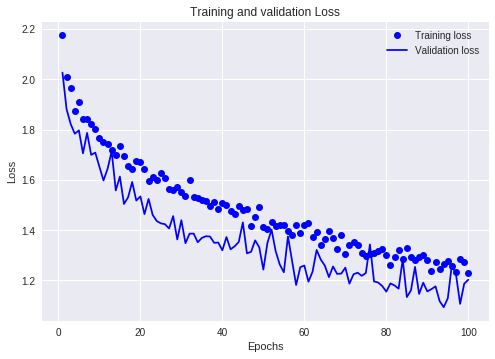

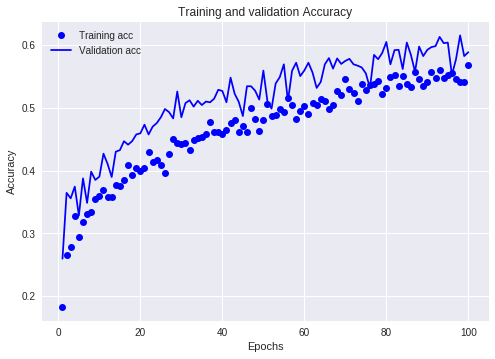

In [0]:
model = create_model(shape=150, samePadding = True)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
history = fit_model_gen(model,train_datagen,32,100,_shape=150,)
train_val_res(history)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/500
100/100 [==============================] - 13s 132ms/step - loss: 2.1740 - acc: 0.1925 - val_loss: 2.0027 - val_acc: 0.2681
Epoch 2/500
100/100 [==============================] - 11s 115ms/step - loss: 2.0230 - acc: 0.2620 - val_loss: 1.8794 - val_acc: 0.3269
Epoch 3/500
100/100 [==============================] - 11s 114ms/step - loss: 1.9017 - acc: 0.3040 - val_loss: 1.9448 - val_acc: 0.3144
Epoch 4/500
100/100 [==============================] - 12s 118ms/step - loss: 1.9124 - acc: 0.3045 - val_loss: 1.8161 - val_acc: 0.3458
Epoch 5/500
100/100 [==============================] - 12s 120ms/step - loss: 1.8592 - acc: 0.3095 - val_loss: 1.7071 - val_acc: 0.4044
Epoch 6/500
100/100 [==============================] - 12s 115ms/step - loss: 1.8332 - acc: 0.3480 - val_loss: 1.7397 - val_acc: 0.3894
Epoch 7/500
100/100 [==============================] - 12s 118ms/step - loss: 1.8486 - acc: 0.322

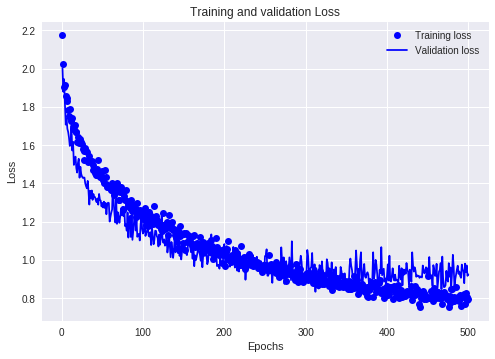

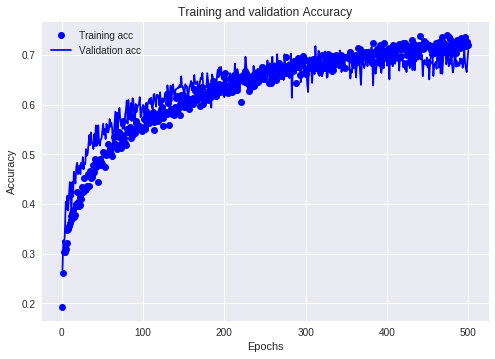

In [0]:
model = create_model(shape=150, samePadding = True)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
history = fit_model_gen(model,train_datagen,32,_epochs = 500,_shape=150,)
train_val_res(history)

In [42]:
from keras.applications import VGG16
_shape = 150
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(_shape,_shape,3))

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count,4 ,4 , 512))
  labels = np.zeros(shape=(sample_count))  
  labels = np_utils.to_categorical(labels, 10)
  generator = datagen.flow_from_directory(
      directory,
      target_size=(_shape,_shape),
      batch_size=batch_size,
      class_mode='categorical')
  i=0
  for inputs_batch,labels_batch in generator:
    feature_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = feature_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break 
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

model = models.Sequential()
model.add(layers.Dense(256,activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 2,099,978
Trainable params: 2,099,978
Non-trainable params: 0
_________________________________________________________________


Train on 2000 samples, validate on 1000 samples
Epoch 1/100
2000/2000 [==============================] - 2s 796us/step - loss: 2.3157 - acc: 0.1105 - val_loss: 2.2460 - val_acc: 0.2260
Epoch 2/100
2000/2000 [==============================] - 1s 410us/step - loss: 2.2520 - acc: 0.1730 - val_loss: 2.1851 - val_acc: 0.2880
Epoch 3/100
2000/2000 [==============================] - 1s 431us/step - loss: 2.1737 - acc: 0.2020 - val_loss: 2.0977 - val_acc: 0.3600
Epoch 4/100
2000/2000 [==============================] - 1s 433us/step - loss: 2.0826 - acc: 0.2805 - val_loss: 2.0047 - val_acc: 0.3980
Epoch 5/100
2000/2000 [==============================] - 1s 442us/step - loss: 2.0109 - acc: 0.3195 - val_loss: 1.9347 - val_acc: 0.4520
Epoch 6/100
2000/2000 [==============================] - 1s 444us/step - loss: 1.9309 - acc: 0.3430 - val_loss: 1.8743 - val_acc: 0.4570
Epoch 7/100
2000/2000 [==============================] - 1s 443us/step - loss: 1.8947 - acc: 0.3455 - val_loss: 1.8236 - val_acc: 

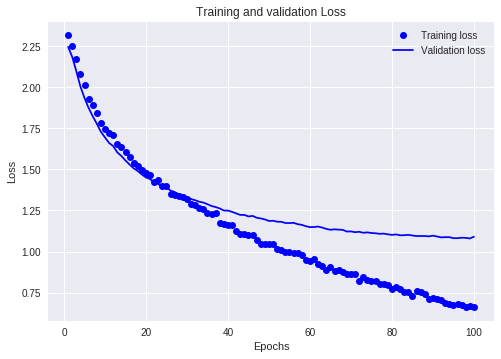

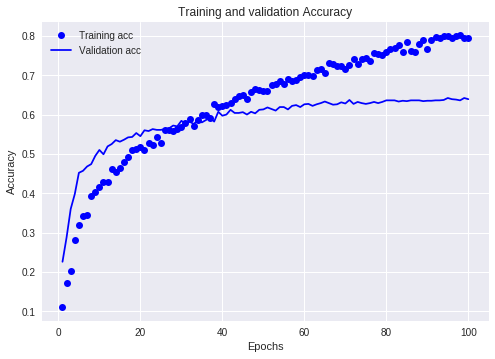

In [43]:
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size = 20,
                    validation_data=(validation_features, validation_labels))
train_val_res(history)

In [0]:
def fit_pretraned_aug(_epochs = 100, _fine_tune = False, _shape = 32):
  from keras.applications import VGG16

  conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(_shape,_shape,3))
  if _fine_tune:
    set_trainable = False
    for layer in conv_base.layers:
      if layer.name =='block5_conv1':
        set_trainable = True
      if set_trainable:
        layer.trainable = True
      else:
        layer.trainable = False
  else:
    conv_base.trainable = False
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256,activation='relu'))
  model.add(layers.Dense(10,activation='sigmoid'))

  train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

  model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='categorical_crossentropy',
                metrics=['acc'])

  history = fit_model_gen(model,train_datagen,32,_epochs, _shape = _shape)
  train_val_res(history)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/100
100/100 [==============================] - 5s 54ms/step - loss: 2.3402 - acc: 0.0890 - val_loss: 2.3402 - val_acc: 0.0806
Epoch 2/100
100/100 [==============================] - 4s 43ms/step - loss: 2.3126 - acc: 0.0800 - val_loss: 2.3047 - val_acc: 0.0994
Epoch 3/100
100/100 [==============================] - 4s 45ms/step - loss: 2.2966 - acc: 0.1025 - val_loss: 2.2821 - val_acc: 0.1144
Epoch 4/100
100/100 [==============================] - 4s 43ms/step - loss: 2.2767 - acc: 0.1165 - val_loss: 2.2648 - val_acc: 0.1326
Epoch 5/100
100/100 [==============================] - 4s 42ms/step - loss: 2.2600 - acc: 0.1195 - val_loss: 2.2486 - val_acc: 0.1663
Epoch 6/100
100/100 [==============================] - 4s 43ms/step - loss: 2.2388 - acc: 0.1695 - val_loss: 2.2357 - val_acc: 0.1669
Epoch 7/100
100/100 [==============================] - 4s 43ms/step - loss: 2.2264 - acc: 0.1740 - val_loss: 

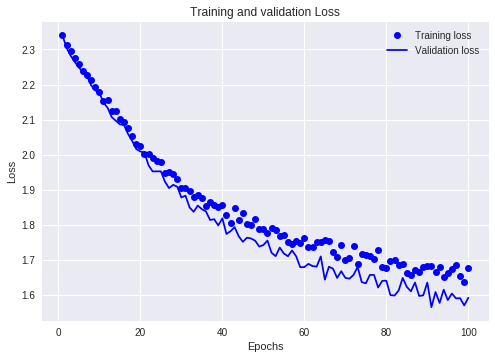

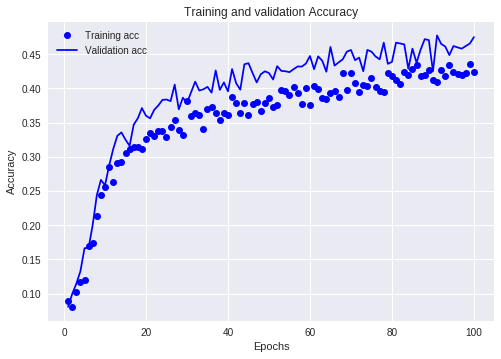

In [47]:
fit_pretraned_aug(_epochs = 100)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/200
100/100 [==============================] - 6s 57ms/step - loss: 2.3371 - acc: 0.0935 - val_loss: 2.3074 - val_acc: 0.1181
Epoch 2/200
100/100 [==============================] - 5s 45ms/step - loss: 2.3056 - acc: 0.1105 - val_loss: 2.2818 - val_acc: 0.1125
Epoch 3/200
100/100 [==============================] - 4s 44ms/step - loss: 2.2863 - acc: 0.1090 - val_loss: 2.2658 - val_acc: 0.1331
Epoch 4/200
100/100 [==============================] - 5s 46ms/step - loss: 2.2671 - acc: 0.1375 - val_loss: 2.2530 - val_acc: 0.1561
Epoch 5/200
100/100 [==============================] - 5s 46ms/step - loss: 2.2513 - acc: 0.1510 - val_loss: 2.2303 - val_acc: 0.2037
Epoch 6/200
100/100 [==============================] - 4s 44ms/step - loss: 2.2368 - acc: 0.1710 - val_loss: 2.2197 - val_acc: 0.2150
Epoch 7/200
100/100 [==============================] - 4s 44ms/step - loss: 2.2236 - acc: 0.2040 - val_loss: 

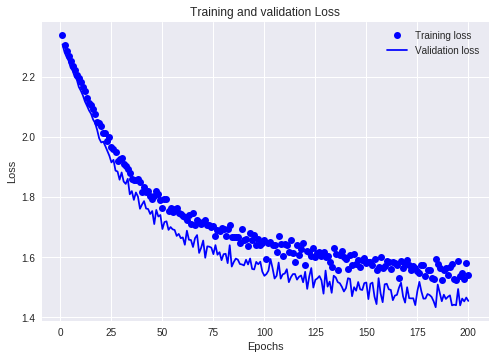

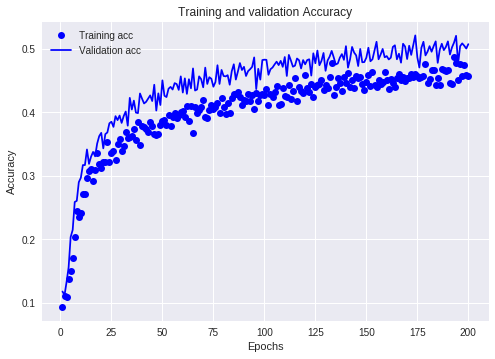

In [53]:
fit_pretraned_aug(_epochs = 200)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/100
100/100 [==============================] - 25s 252ms/step - loss: 2.2606 - acc: 0.1625 - val_loss: 2.2239 - val_acc: 0.2013
Epoch 2/100
100/100 [==============================] - 21s 209ms/step - loss: 2.1340 - acc: 0.2830 - val_loss: 2.1215 - val_acc: 0.2431
Epoch 3/100
100/100 [==============================] - 21s 209ms/step - loss: 2.0130 - acc: 0.3195 - val_loss: 2.0325 - val_acc: 0.2906
Epoch 4/100
100/100 [==============================] - 22s 215ms/step - loss: 1.9212 - acc: 0.3480 - val_loss: 1.9466 - val_acc: 0.3274
Epoch 5/100
100/100 [==============================] - 21s 209ms/step - loss: 1.8478 - acc: 0.3770 - val_loss: 1.8857 - val_acc: 0.3800
Epoch 6/100
100/100 [==============================] - 21s 210ms/step - loss: 1.7843 - acc: 0.4055 - val_loss: 1.8311 - val_acc: 0.3844
Epoch 7/100
100/100 [==============================] - 21s 209ms/step - loss: 1.7343 - acc: 0.425

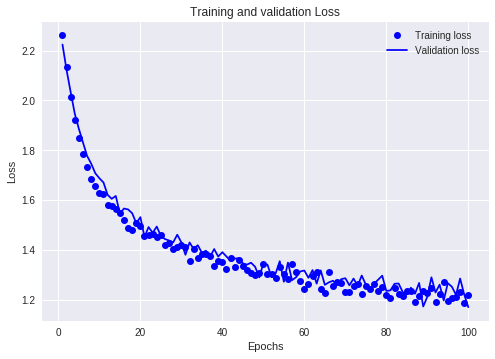

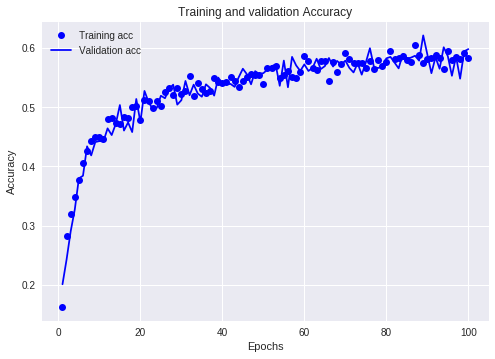

In [57]:
fit_pretraned_aug(_epochs = 100, _shape = 150)

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Epoch 1/100
100/100 [==============================] - 27s 266ms/step - loss: 2.0060 - acc: 0.3040 - val_loss: 1.7407 - val_acc: 0.4062
Epoch 2/100
100/100 [==============================] - 23s 234ms/step - loss: 1.6066 - acc: 0.4385 - val_loss: 1.4249 - val_acc: 0.4919
Epoch 3/100
100/100 [==============================] - 24s 235ms/step - loss: 1.4355 - acc: 0.4830 - val_loss: 1.2476 - val_acc: 0.5800
Epoch 4/100
100/100 [==============================] - 23s 234ms/step - loss: 1.4477 - acc: 0.4845 - val_loss: 1.3129 - val_acc: 0.5577
Epoch 5/100
100/100 [==============================] - 24s 236ms/step - loss: 1.3755 - acc: 0.5270 - val_loss: 1.1966 - val_acc: 0.5944
Epoch 6/100
100/100 [==============================] - 24s 235ms/step - loss: 1.2505 - acc: 0.5630 - val_loss: 1.2547 - val_acc: 0.5650
Epoch 7/100
100/100 [==============================] - 23s 234ms/step - loss: 1.2470 - acc: 0.566

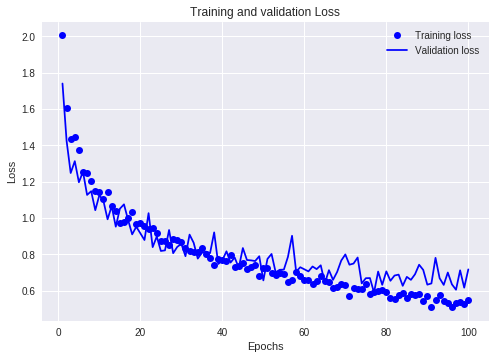

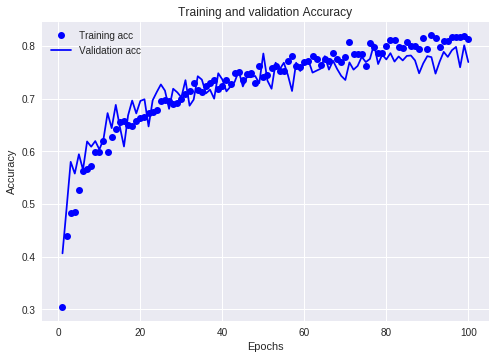

In [60]:
fit_pretraned_aug(_epochs = 100,_shape = 150, _fine_tune = True)